# Analyzing Anime Popularity Trends with Python

This project explores trends in anime popularity using MyAnimeList data.
The analysis focuses on user engagement, genre popularity, and release trends over time.

## Data Loading & Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("anime.csv")
df.head()

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,...,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,...,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,...,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,...,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,...,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0


## Initial Data Exploration

In [3]:
df.shape        # rows, columns

(17562, 35)

In [4]:
df.columns      # column names

Index(['MAL_ID', 'Name', 'Score', 'Genres', 'English name', 'Japanese name',
       'Type', 'Episodes', 'Aired', 'Premiered', 'Producers', 'Licensors',
       'Studios', 'Source', 'Duration', 'Rating', 'Ranked', 'Popularity',
       'Members', 'Favorites', 'Watching', 'Completed', 'On-Hold', 'Dropped',
       'Plan to Watch', 'Score-10', 'Score-9', 'Score-8', 'Score-7', 'Score-6',
       'Score-5', 'Score-4', 'Score-3', 'Score-2', 'Score-1'],
      dtype='object')

In [5]:
df.info()       # data types + nulls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17562 entries, 0 to 17561
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MAL_ID         17562 non-null  int64 
 1   Name           17562 non-null  object
 2   Score          17562 non-null  object
 3   Genres         17562 non-null  object
 4   English name   17562 non-null  object
 5   Japanese name  17562 non-null  object
 6   Type           17562 non-null  object
 7   Episodes       17562 non-null  object
 8   Aired          17562 non-null  object
 9   Premiered      17562 non-null  object
 10  Producers      17562 non-null  object
 11  Licensors      17562 non-null  object
 12  Studios        17562 non-null  object
 13  Source         17562 non-null  object
 14  Duration       17562 non-null  object
 15  Rating         17562 non-null  object
 16  Ranked         17562 non-null  object
 17  Popularity     17562 non-null  int64 
 18  Members        17562 non-n

In [6]:
df.isnull().sum()

MAL_ID           0
Name             0
Score            0
Genres           0
English name     0
Japanese name    0
Type             0
Episodes         0
Aired            0
Premiered        0
Producers        0
Licensors        0
Studios          0
Source           0
Duration         0
Rating           0
Ranked           0
Popularity       0
Members          0
Favorites        0
Watching         0
Completed        0
On-Hold          0
Dropped          0
Plan to Watch    0
Score-10         0
Score-9          0
Score-8          0
Score-7          0
Score-6          0
Score-5          0
Score-4          0
Score-3          0
Score-2          0
Score-1          0
dtype: int64

## Data Cleaning

In [9]:
# Standardize column names
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.columns

Index(['mal_id', 'name', 'score', 'genres', 'english_name', 'japanese_name',
       'type', 'episodes', 'aired', 'premiered', 'producers', 'licensors',
       'studios', 'source', 'duration', 'rating', 'ranked', 'popularity',
       'members', 'favorites', 'watching', 'completed', 'on-hold', 'dropped',
       'plan_to_watch', 'score-10', 'score-9', 'score-8', 'score-7', 'score-6',
       'score-5', 'score-4', 'score-3', 'score-2', 'score-1'],
      dtype='object')

In [11]:
# Drop rows without score or members
df = df.dropna(subset=['score', 'members'])

# Convert episodes to numeric
df['episodes'] = pd.to_numeric(df['episodes'], errors='coerce')

# Drop missing episodes
df = df.dropna(subset=['episodes'])

# Clean genres column
df['genres'] = df['genres'].str.split(', ')

## Most Popular Anime

In [12]:
top10 = df.sort_values('members', ascending=False).head(10)
top10[['name', 'score', 'members']]

,name,score,members
1393,Death Note,8.63,2589552
7449,Shingeki no Kyojin,8.48,2531397
3971,Fullmetal Alchemist: Brotherhood,9.19,2248456
6614,Sword Art Online,7.25,2214395
10451,One Punch Man,8.57,2123866
11185,Boku no Hero Academia,8.11,1909814
8646,Tokyo Ghoul,7.81,1895488
10,Naruto,7.91,1830540
5683,Steins;Gate,9.11,1771162
8148,No Game No Life,8.2,1751054


In [19]:
df = df.dropna(subset=['score', 'members'])

## Relationship Between Score and Popularity

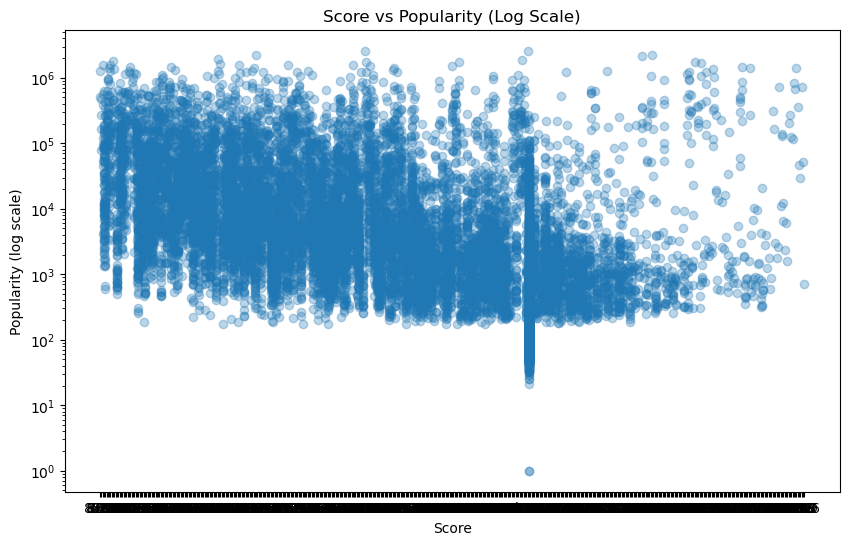

In [34]:
plt.figure(figsize=(10,6))
plt.scatter(df['score'], df['members'], alpha=0.3)
plt.yscale('log')
plt.xlabel("Score")
plt.ylabel("Popularity (log scale)")
plt.title("Score vs Popularity (Log Scale)")
plt.show()

## Genre Popularity Analysis

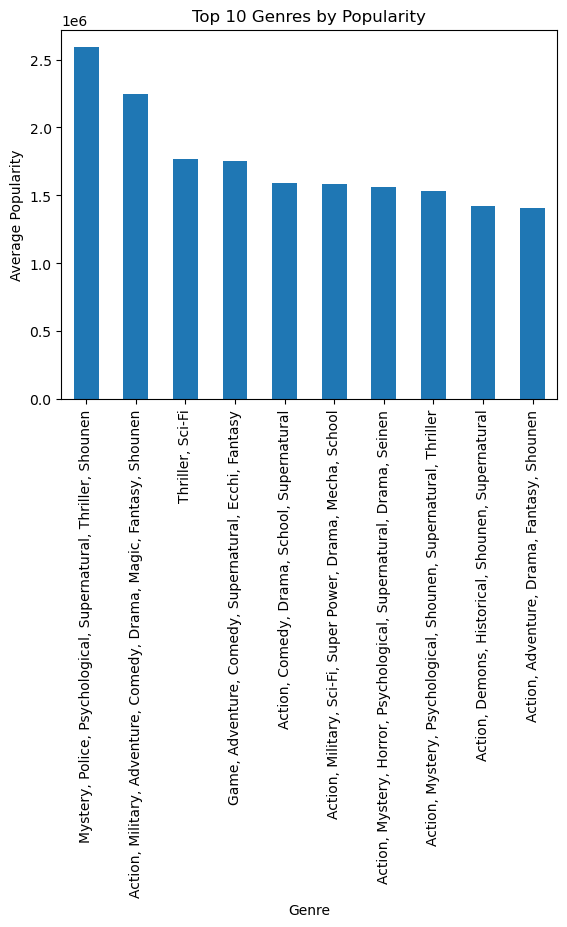

In [22]:
genre_popularity.plot(kind='bar')
plt.title("Top 10 Genres by Popularity")
plt.xlabel("Genre")
plt.ylabel("Average Popularity")
plt.show()

## Anime Release Trends Over Time

In [24]:
df['year'] = df['aired'].str.extract(r'(\d{4})')
df['year'] = pd.to_numeric(df['year'], errors='coerce')

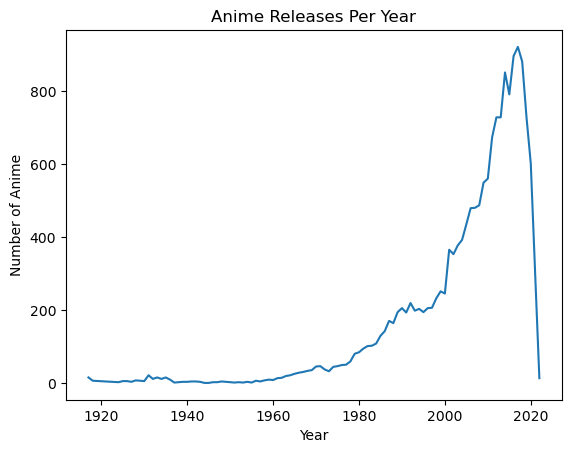

In [25]:
df.groupby('year')['name'].count().plot()
plt.title("Anime Releases Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Anime")
plt.show()

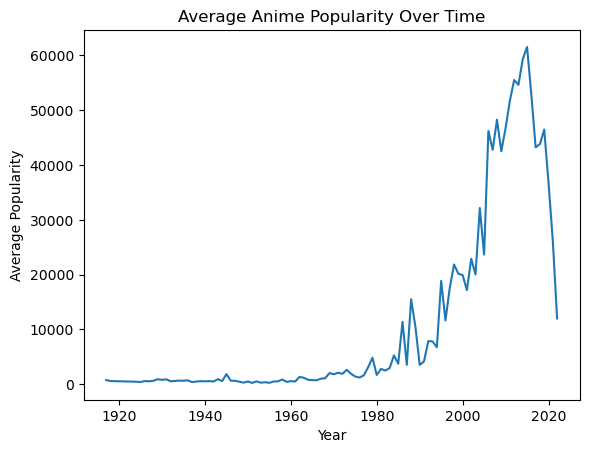

In [26]:
df.groupby('year')['members'].mean().plot()
plt.title("Average Anime Popularity Over Time")
plt.xlabel("Year")
plt.ylabel("Average Popularity")
plt.show()

## Episodes vs User Engagement

In [27]:
df.groupby('type')['members'].mean().sort_values(ascending=False)

type
TV         91618.473779
Movie      22001.646498
Special    12339.056808
OVA        10752.127889
Unknown     9839.108108
ONA         6698.610383
Music       1133.599728
Name: members, dtype: float64

### Relationship Between Number of Episodes and Anime Popularity

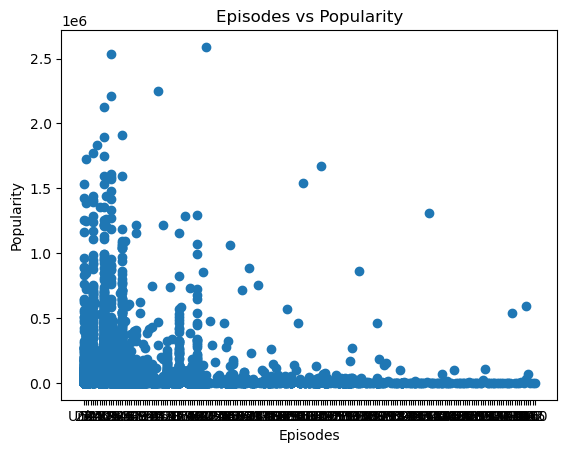

In [28]:
plt.figure()
plt.scatter(df['episodes'], df['members'])
plt.xlabel("Episodes")
plt.ylabel("Popularity")
plt.title("Episodes vs Popularity")
plt.show()

## Key Insights
- Action, Fantasy, and Adventure genres attract the highest user engagement
- Higher-rated anime generally have more members, but popularity is not driven by score alone
- Anime releases have increased significantly after 2010
- Longer series do not always guarantee higher popularity